# 기반 라이브러리 임포트


In [269]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install tensorflow
# !pip install scikit-learn
# !pip install seaborn

In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [271]:
np.random.seed(32)

# 데이터 준비

In [272]:
# https://files.grouplens.org/datasets/movielens/ml-1m.zip
!wget -nc https://files.grouplens.org/datasets/movielens/ml-100k.zip

File ‘ml-100k.zip’ already there; not retrieving.



In [273]:
!unzip -n ml-100k.zip

Archive:  ml-100k.zip


In [274]:
user_column_names =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user_df = pd.read_csv("ml-100k/u.user", sep='|', names=user_column_names)

In [275]:
user_df.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [276]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [277]:
user_df.drop(columns="zip_code", inplace=True)

In [278]:
user_df = pd.get_dummies(user_df)

In [279]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   user_id                   943 non-null    int64
 1   age                       943 non-null    int64
 2   sex_F                     943 non-null    bool 
 3   sex_M                     943 non-null    bool 
 4   occupation_administrator  943 non-null    bool 
 5   occupation_artist         943 non-null    bool 
 6   occupation_doctor         943 non-null    bool 
 7   occupation_educator       943 non-null    bool 
 8   occupation_engineer       943 non-null    bool 
 9   occupation_entertainment  943 non-null    bool 
 10  occupation_executive      943 non-null    bool 
 11  occupation_healthcare     943 non-null    bool 
 12  occupation_homemaker      943 non-null    bool 
 13  occupation_lawyer         943 non-null    bool 
 14  occupation_librarian      943 non-null    

In [280]:
user_df.head()

,user_id,age,sex_F,sex_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,24,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,53,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3,23,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,24,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,33,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [281]:
for column in ["age"]:
    MIN = user_df[column].min()
    MAX = user_df[column].max()
    user_df[column] = (user_df[column] - MIN) / (MAX - MIN)
user_df.head()

,user_id,age,sex_F,sex_M,occupation_administrator,occupation_artist,occupation_doctor,occupation_educator,occupation_engineer,occupation_entertainment,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,0.257576,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,2,0.696970,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,3,0.242424,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,0.257576,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,0.393939,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [282]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   943 non-null    int64  
 1   age                       943 non-null    float64
 2   sex_F                     943 non-null    bool   
 3   sex_M                     943 non-null    bool   
 4   occupation_administrator  943 non-null    bool   
 5   occupation_artist         943 non-null    bool   
 6   occupation_doctor         943 non-null    bool   
 7   occupation_educator       943 non-null    bool   
 8   occupation_engineer       943 non-null    bool   
 9   occupation_entertainment  943 non-null    bool   
 10  occupation_executive      943 non-null    bool   
 11  occupation_healthcare     943 non-null    bool   
 12  occupation_homemaker      943 non-null    bool   
 13  occupation_lawyer         943 non-null    bool   
 14  occupation

In [283]:
item_column_names = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

item_df = pd.read_csv('ml-100k/u.item', sep='|', names=item_column_names, encoding='latin-1')


In [284]:
item_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [285]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [286]:
item_df.drop(columns=['movie title', 'release date', 'video release date', 'IMDb URL'], inplace=True)
item_df.head()

,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [287]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   movie id     1682 non-null   int64
 1   unknown      1682 non-null   int64
 2   Action       1682 non-null   int64
 3   Adventure    1682 non-null   int64
 4   Animation    1682 non-null   int64
 5   Children's   1682 non-null   int64
 6   Comedy       1682 non-null   int64
 7   Crime        1682 non-null   int64
 8   Documentary  1682 non-null   int64
 9   Drama        1682 non-null   int64
 10  Fantasy      1682 non-null   int64
 11  Film-Noir    1682 non-null   int64
 12  Horror       1682 non-null   int64
 13  Musical      1682 non-null   int64
 14  Mystery      1682 non-null   int64
 15  Romance      1682 non-null   int64
 16  Sci-Fi       1682 non-null   int64
 17  Thriller     1682 non-null   int64
 18  War          1682 non-null   int64
 19  Western      1682 non-null   int64
dtypes: int64

In [288]:
rating_column_names = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

rating_base_df = pd.read_csv('ml-100k/ua.base', sep='\t', names=rating_column_names, encoding='latin-1')
rating_test_df = pd.read_csv('ml-100k/ua.test', sep='\t', names=rating_column_names, encoding='latin-1')


In [289]:
rating_base_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [290]:
rating_test_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


In [291]:
# rating_df = rating_base_df.append(rating_test_df)

rating_df = pd.concat([rating_base_df, rating_test_df], ignore_index=True)

In [292]:
rating_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [293]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [294]:
rating_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


In [295]:
rating_df.drop(columns="unix_timestamp", inplace=True)
rating_df.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


rating


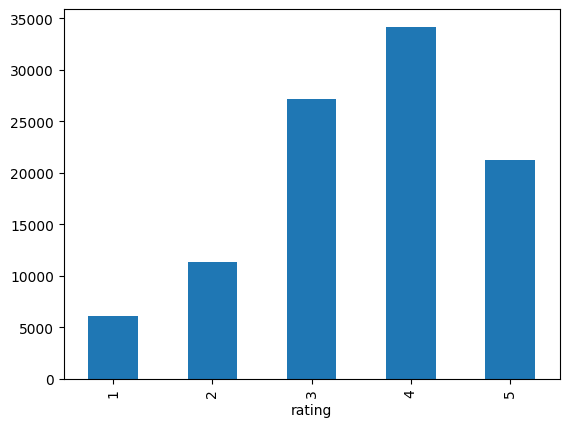

In [296]:
for column in ["rating"]:
    print(column)
    rating_df[column].value_counts().sort_index().plot(kind='bar')
    plt.show()

In [297]:
SCORE_DIFF = rating_df["rating"].max() - rating_df["rating"].min()
SCORE_MIN = rating_df["rating"].min()

In [298]:
print(f"SCORE_DIFF = {SCORE_DIFF}")
print(f"SCORE_MIN = {SCORE_MIN}")

SCORE_DIFF = 4
SCORE_MIN = 1


In [299]:
for column in ["rating"]:
    MIN = rating_df[column].min()
    MAX = rating_df[column].max()
    rating_df[column] = (rating_df[column] - MIN) / (MAX - MIN)
rating_df.head()

,user_id,movie_id,rating
0,1,1,1.00
1,1,2,0.50
2,1,3,0.75
3,1,4,0.50
4,1,5,0.50


# 기반 클래스 생성

In [300]:
LATENT_SIZE = 32

In [301]:
user_np = user_df.to_numpy()
print(user_np.shape)
print(user_np[:2])

(943, 25)
[[1 0.25757575757575757 False True False False False False False False
  False False False False False False False False False False False False
  False True False]
 [2 0.696969696969697 True False False False False False False False
  False False False False False False False True False False False False
  False False False]]


In [302]:
item_np = item_df.to_numpy()
print(item_np.shape)
print(item_np[:2])

(1682, 20)
[[1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]]


In [303]:
rating_np = rating_df.to_numpy()
print(rating_np.shape)
print(rating_np[:5])

(100000, 3)
[[1.   1.   1.  ]
 [1.   2.   0.5 ]
 [1.   3.   0.75]
 [1.   4.   0.5 ]
 [1.   5.   0.5 ]]


# User, Item, Case 클래스 정의

In [304]:
import copy

In [305]:
class User:

    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}, latent:{self.latent[:2]}"

    def copy(self):
        return copy.deepcopy(self)

    def is_same(self, other):
        return self.id == other.id

In [306]:
class Item:

    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}, latent:{self.latent[:2]}"

    def copy(self):
        return copy.deepcopy(self)

    def is_same(self, other):
        return self.id == other.id

In [307]:
class Case:

    def __init__(self, user, item, score):
        self.user = user
        self.item = item
        self.score = score

    def __str__(self):
        return f"user:{self.user.id}, item:{self.item.id}, score:{self.score}"

    def score(self):
        return self.score

    def copy(self):
        return copy.deepcopy(self)

# User, Item 데이터 로딩

In [308]:
id_2_user = {}
for i in range(len(user_np)):
    row = user_np[i]
    user_id = int(row[0])
    features = row[1:]
    user = User(user_id, features)
    id_2_user[user_id] = user

In [309]:
id_2_item = {}
for i in range(len(item_np)):
    row = item_np[i]
    item_id = int(row[0])
    features = row[1:]
    item = Item(item_id, features)
    id_2_item[item_id] = item

# Case 데이터 로딩

In [310]:
all_cases = []
for i in range(len(rating_np)):
  (user_id, item_id, score) = rating_np[i]
  user_id = int(user_id)
  item_id = int(item_id)
  score = [score]
  user = id_2_user[user_id]
  item = id_2_item[item_id]
  case = Case(user.copy(), item.copy(), score.copy())
  if(i<10): print(case)
  all_cases.append(case)

user:1, item:1, score:[1.0]
user:1, item:2, score:[0.5]
user:1, item:3, score:[0.75]
user:1, item:4, score:[0.5]
user:1, item:5, score:[0.5]
user:1, item:6, score:[1.0]
user:1, item:7, score:[0.75]
user:1, item:8, score:[0.0]
user:1, item:9, score:[1.0]
user:1, item:10, score:[0.5]


In [311]:
print(f"user : {len(id_2_user)}")
print(f"item : {len(id_2_item)}")
print(f"case : {len(all_cases)}")

user : 943
item : 1682
case : 100000


# 상수 정의

In [312]:
SCORE_SIZE = len(all_cases[0].score)
USER_FEATURE_SIZE = len(all_cases[0].user.features)
ITEM_FEATURE_SIZE = len(all_cases[0].item.features)
print(f"SCORE_SIZE : {SCORE_SIZE}")
print(f"USER_FEATURE_SIZE : {USER_FEATURE_SIZE}")
print(f"ITEM_FEATURE_SIZE : {ITEM_FEATURE_SIZE}")


SCORE_SIZE : 1
USER_FEATURE_SIZE : 24
ITEM_FEATURE_SIZE : 19


# train, valid, test 데이터 나누기

우선 섞고

In [313]:
np.random.shuffle(all_cases)


In [314]:
test_ratio = 0.8
split_index = int(len(all_cases)*0.8)
train_cases, test_cases = all_cases[:split_index], all_cases[split_index:]
valid_cases, test_cases = test_cases[:int(len(test_cases)/2)], test_cases[int(len(test_cases)/2):]

In [315]:
print(len(train_cases))
print(len(valid_cases))
print(len(test_cases))

80000
10000
10000


In [316]:
test_ratio = 0.8
split_index = int(len(all_cases)*0.8)
train_cases, test_cases = all_cases[:split_index], all_cases[split_index:]
valid_cases, test_cases = test_cases[:int(len(test_cases)/2)], test_cases[int(len(test_cases)/2):]

# train에 없는 user, item를 valid, test에서 삭제

In [317]:
train_user_id_set = set()
train_item_id_set = set()
for case in train_cases:
    train_user_id_set.add(case.user.id)
    train_item_id_set.add(case.item.id)

print("user id count : ", len(train_user_id_set))
print("item id count : ", len(train_item_id_set))


user id count :  943
item id count :  1647


In [318]:

to_be_removed_cases = set()
for case in valid_cases:
    if case.user.id not in train_user_id_set:
        to_be_removed_cases.add(case)
    if case.item.id not in train_item_id_set:
        to_be_removed_cases.add(case)

print(len(to_be_removed_cases))

for case in to_be_removed_cases:
    valid_cases.remove(case)
    all_cases.remove(case)


to_be_removed_cases = set()
for case in test_cases:
    if case.user.id not in train_user_id_set:
        to_be_removed_cases.add(case)
    if case.item.id not in train_item_id_set:
        to_be_removed_cases.add(case)

print(len(to_be_removed_cases))

for case in to_be_removed_cases:
    test_cases.remove(case)
    all_cases.remove(case)



18
21


In [319]:
print(len(train_cases))
print(len(valid_cases))
print(len(test_cases))

80000
9982
9979


In [320]:
print(train_cases[0])
print(valid_cases[0])
print(test_cases[0])

user:650, item:639, score:[0.5]
user:216, item:546, score:[0.25]
user:655, item:726, score:[0.25]


random seed 설정해서 항상 다음이 나와야 한다.

```
user:650, item:639, score:[0.5]
user:216, item:546, score:[0.25]
user:655, item:726, score:[0.25]
```

# 모델 정의

In [321]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model
import tensorflow
from tensorflow.keras.optimizers.legacy import Adam, RMSprop


optimizer = Adam(learning_rate=0.001*1.0)


def build_decoder(name="decoder"):

  user_latent_input = Input((LATENT_SIZE,), name="user_latent_input")
  user_feature_input = Input((USER_FEATURE_SIZE,), name="user_feature_input")
  item_feature_input = Input((ITEM_FEATURE_SIZE,), name="item_feature_input")
  item_latent_input = Input((LATENT_SIZE,), name="item_latent_input")

  user_latent_x = Dense(int(LATENT_SIZE/2), activation="swish")(user_latent_input)
  user_feature_x = Dense(6, activation="swish")(user_feature_input)
  item_feature_x = Dense(6, activation="swish")(item_feature_input)
  item_latent_x = Dense(int(LATENT_SIZE/2), activation="swish")(item_latent_input)

  x = concatenate([user_latent_x, user_feature_x, item_feature_x, item_latent_x])
  # x = Dense(240, activation="swish")(x)
  x = Dense(32, activation="swish")(x)
  x = Dense(12, activation="swish")(x)
  x = Dense(6, activation="swish")(x)
  output_score = Dense(SCORE_SIZE, activation="sigmoid", name="output_score")(x)

  return Model((user_latent_input, user_feature_input, item_feature_input, item_latent_input), output_score, name=name)


def encoder_block(user_latent, user_feature, item_feature, item_latent, score_index=0):

  user_latent_x = Dense(int(LATENT_SIZE/2), activation="swish")(user_latent)
  user_feature_x = Dense(6, activation="swish")(user_feature)
  item_feature_x = Dense(6, activation="swish")(item_feature)
  item_latent_x = Dense(int(LATENT_SIZE/2), activation="swish")(item_latent)

  x = concatenate([user_latent_x, user_feature_x, item_feature_x, item_latent_x])
  x = Dense(32, activation="swish")(x)
  x = Dense(32, activation="swish")(x)
  x = Dense(32, activation="swish")(x)
  x = Dense(32, activation="swish")(x)

  x1 = Dense(32, activation="swish")(x)
  x1 = Dense(12, activation="swish")(x1)
  x1 = Dense(32, activation="swish")(x1)
  output_latent = Dense(LATENT_SIZE, activation="sigmoid")(x1)
  
  x2 = Dense(32, activation="swish")(x)
  x2 = Dense(12, activation="swish")(x2)
  x2 = Dense(32, activation="swish")(x2)
  output_score = Dense(SCORE_SIZE, activation="sigmoid", name=f"encoder_score_{score_index}")(x2)
  
  return output_latent, output_score


def build_user_latent_finding_encoder(encoder_block_count=1):

  user_latent_input = Input((LATENT_SIZE,), name="user_latent_input")
  user_feature_input = Input((USER_FEATURE_SIZE,), name="user_feature_input")
  item_feature_input = Input((ITEM_FEATURE_SIZE,), name="item_feature_input")
  item_latent_input = Input((LATENT_SIZE,), name="item_latent_input")

  user_latent = user_latent_input

  output_scores = []
  for i in range(encoder_block_count):
    user_latent, score = encoder_block(user_latent, user_feature_input, item_feature_input, item_latent_input, score_index=i)
    output_scores.append(score)

  return Model((user_latent_input, user_feature_input, item_feature_input, item_latent_input), (user_latent, *output_scores), name="encoder")



def build_item_latent_finding_encoder(encoder_block_count=1):

  user_latent_input = Input((LATENT_SIZE,), name="user_latent_input")
  user_feature_input = Input((USER_FEATURE_SIZE,), name="user_feature_input")
  item_feature_input = Input((ITEM_FEATURE_SIZE,), name="item_feature_input")
  item_latent_input = Input((LATENT_SIZE,), name="item_latent_input")

  item_latent = item_latent_input

  output_scores = []
  for i in range(encoder_block_count):
    item_latent, score = encoder_block(user_latent_input, user_feature_input, item_feature_input, item_latent, score_index=i)
    output_scores.append(score)

  return Model((user_latent_input, user_feature_input, item_feature_input, item_latent_input), (item_latent, *output_scores), name="encoder")


def build_and_compile_user_latent_finder(decoder, encoder_block_count=1):

  encoder = build_user_latent_finding_encoder(encoder_block_count)

  user_latent_input = Input((LATENT_SIZE,), name="user_latent_input")
  user_feature_input = Input((USER_FEATURE_SIZE,), name="user_feature_input")
  item_feature_input = Input((ITEM_FEATURE_SIZE,), name="item_feature_input")
  item_latent_input = Input((LATENT_SIZE,), name="item_latent_input")

  user_latent, *output_scores = encoder((user_latent_input, user_feature_input, item_feature_input, item_latent_input))
  final_score = decoder((user_latent, user_feature_input, item_feature_input, item_latent_input))
  output_scores.append(final_score)
  model = Model((user_latent_input, user_feature_input, item_feature_input, item_latent_input), output_scores, name="user_latent_finder")
  model.encoder = encoder
  model.decoder = decoder

  score_count = encoder_block_count + 1
  loss_weights = [1/score_count] * score_count  
  model.compile(loss="mse", optimizer=optimizer, loss_weights=loss_weights)

  return model


def build_and_compile_item_latent_finder(decoder, encoder_block_count=1):

  encoder = build_item_latent_finding_encoder(encoder_block_count)

  user_latent_input = Input((LATENT_SIZE,))
  user_feature_input = Input((USER_FEATURE_SIZE,))
  item_feature_input = Input((ITEM_FEATURE_SIZE,))
  item_latent_input = Input((LATENT_SIZE,))

  item_latent, *output_scores = encoder((user_latent_input, user_feature_input, item_feature_input, item_latent_input))
  final_score = decoder((user_latent_input, user_feature_input, item_feature_input, item_latent))
  output_scores.append(final_score)
  model = Model((user_latent_input, user_feature_input, item_feature_input, item_latent_input), output_scores, name="item_latent_finder")
  model.encoder = encoder
  model.decoder = decoder

  score_count = encoder_block_count + 1
  loss_weights = [1/score_count] * score_count
  model.compile(loss="mse", optimizer=optimizer, loss_weights=loss_weights)

  return model


# 학습을 위한 데이터 생성 함수들 정의

In [322]:
ENCODER_BLOCK_COUNT = 5

In [323]:

def build_model_x_and_y(cases, score_count=1):
    user_latents = np.array([case.user.latent for case in cases]).astype(float)
    user_features = np.array([case.user.features for case in cases]).astype(float)
    item_features = np.array([case.item.features for case in cases]).astype(float)
    item_latents = np.array([case.item.latent for case in cases]).astype(float)
    output_scores = np.array([case.score for case in cases]).astype(float)
    return (user_latents, user_features, item_features, item_latents), [output_scores]*score_count



In [327]:
# 요 모델들은 실제 사용하지 않는다. 모델 구조를 보기 위해 만들쁜
tmp_common_decoder = build_decoder()
tmp_user_latent_finder = build_and_compile_user_latent_finder(tmp_common_decoder, encoder_block_count=ENCODER_BLOCK_COUNT)
tmp_item_latent_finder = build_and_compile_item_latent_finder(tmp_common_decoder, encoder_block_count=ENCODER_BLOCK_COUNT)

In [328]:
tmp_item_latent_finder.summary()

Model: "item_latent_finder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_85 (InputLayer)       [(None, 32)]                 0         []                            
                                                                                                  
 input_86 (InputLayer)       [(None, 24)]                 0         []                            
                                                                                                  
 input_87 (InputLayer)       [(None, 19)]                 0         []                            
                                                                                                  
 input_88 (InputLayer)       [(None, 32)]                 0         []                            
                                                                                 

finder training 1/10


0/50
625/625 [==============================] - 11s 10ms/step - loss: 0.0757 - encoder_loss: 0.0752 - encoder_1_loss: 0.0757 - encoder_2_loss: 0.0760 - encoder_3_loss: 0.0761 - encoder_4_loss: 0.0760 - common_decoder_loss: 0.0751 - val_loss: 0.0719 - val_encoder_loss: 0.0713 - val_encoder_1_loss: 0.0715 - val_encoder_2_loss: 0.0718 - val_encoder_3_loss: 0.0721 - val_encoder_4_loss: 0.0723 - val_common_decoder_loss: 0.0723
1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.0721 - encoder_loss: 0.0718 - encoder_1_loss: 0.0719 - encoder_2_loss: 0.0719 - encoder_3_loss: 0.0722 - encoder_4_loss: 0.0724 - common_decoder_loss: 0.0722 - val_loss: 0.0701 - val_encoder_loss: 0.0700 - val_encoder_1_loss: 0.0698 - val_encoder_2_loss: 0.0700 - val_encoder_3_loss: 0.0704 - val_encoder_4_loss: 0.0702 - val_common_decoder_loss: 0.0701
2/50
625/625 [==============================] - 5s 7ms/step - loss: 0.0701 - encoder_loss: 0.0704 - encoder_1_loss: 0.0701 - en

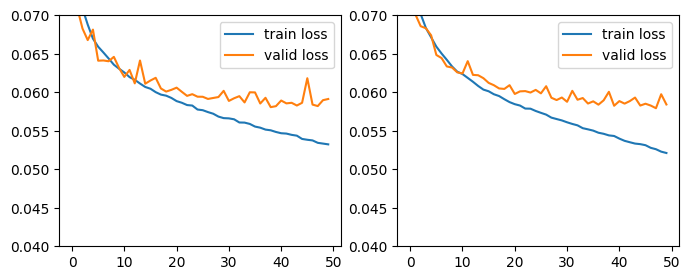

user_latent_finder :  0.053 0.059
item_latent_finder :  0.052 0.058

625/625 [==============================] - 2s 3ms/step
std :  [0.17600615 0.09107442 0.16456927]
std :  [0.66750637 0.34540132 0.62413178]
finder training 2/10


0/50
625/625 [==============================] - 11s 10ms/step - loss: 0.0612 - encoder_loss: 0.0590 - encoder_1_loss: 0.0598 - encoder_2_loss: 0.0609 - encoder_3_loss: 0.0617 - encoder_4_loss: 0.0626 - common_decoder_loss: 0.0631 - val_loss: 0.0589 - val_encoder_loss: 0.0586 - val_encoder_1_loss: 0.0586 - val_encoder_2_loss: 0.0588 - val_encoder_3_loss: 0.0590 - val_encoder_4_loss: 0.0591 - val_common_decoder_loss: 0.0594
1/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0583 - encoder_loss: 0.0579 - encoder_1_loss: 0.0579 - encoder_2_loss: 0.0581 - encoder_3_loss: 0.0584 - encoder_4_loss: 0.0587 - common_decoder_loss: 0.0590 - val_loss: 0.0591 - val_encoder_loss: 0.0589 - val_encoder_1_loss: 0.0590 - val_encoder_2_loss: 0.0588 - val_encod

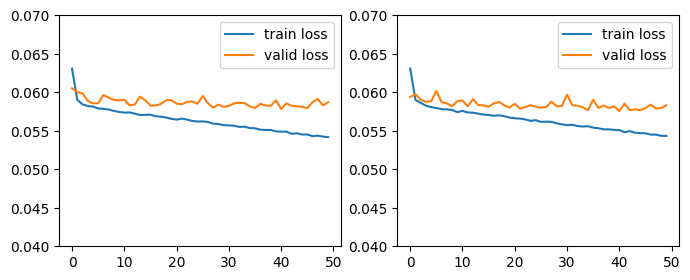

user_latent_finder :  0.054 0.059
item_latent_finder :  0.054 0.058

625/625 [==============================] - 3s 3ms/step
std :  [0.15541318 0.1079385  0.20294663]
std :  [0.67098323 0.46601536 0.87620488]
finder training 3/10


0/50
625/625 [==============================] - 10s 9ms/step - loss: 0.0603 - encoder_loss: 0.0581 - encoder_1_loss: 0.0589 - encoder_2_loss: 0.0599 - encoder_3_loss: 0.0608 - encoder_4_loss: 0.0618 - common_decoder_loss: 0.0623 - val_loss: 0.0588 - val_encoder_loss: 0.0587 - val_encoder_1_loss: 0.0586 - val_encoder_2_loss: 0.0588 - val_encoder_3_loss: 0.0588 - val_encoder_4_loss: 0.0591 - val_common_decoder_loss: 0.0591
1/50
625/625 [==============================] - 4s 7ms/step - loss: 0.0576 - encoder_loss: 0.0571 - encoder_1_loss: 0.0572 - encoder_2_loss: 0.0574 - encoder_3_loss: 0.0577 - encoder_4_loss: 0.0580 - common_decoder_loss: 0.0582 - val_loss: 0.0583 - val_encoder_loss: 0.0583 - val_encoder_1_loss: 0.0584 - val_encoder_2_loss: 0.0584 - val_encode

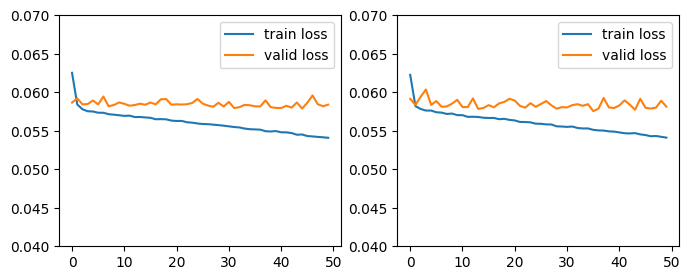

user_latent_finder :  0.054 0.058
item_latent_finder :  0.054 0.058

625/625 [==============================] - 2s 2ms/step
std :  [0.27991545 0.16610425 0.09859567]
std :  [1.27900982 0.75897549 0.45051045]
finder training 4/10


0/50
625/625 [==============================] - 10s 9ms/step - loss: 0.0603 - encoder_loss: 0.0579 - encoder_1_loss: 0.0590 - encoder_2_loss: 0.0600 - encoder_3_loss: 0.0608 - encoder_4_loss: 0.0618 - common_decoder_loss: 0.0621 - val_loss: 0.0597 - val_encoder_loss: 0.0589 - val_encoder_1_loss: 0.0595 - val_encoder_2_loss: 0.0598 - val_encoder_3_loss: 0.0599 - val_encoder_4_loss: 0.0603 - val_common_decoder_loss: 0.0596
1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.0575 - encoder_loss: 0.0571 - encoder_1_loss: 0.0571 - encoder_2_loss: 0.0573 - encoder_3_loss: 0.0575 - encoder_4_loss: 0.0578 - common_decoder_loss: 0.0580 - val_loss: 0.0584 - val_encoder_loss: 0.0584 - val_encoder_1_loss: 0.0583 - val_encoder_2_loss: 0.0583 - val_encode

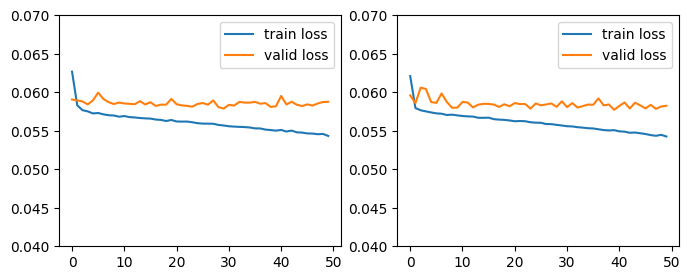

user_latent_finder :  0.054 0.059
item_latent_finder :  0.054 0.058

625/625 [==============================] - 2s 2ms/step
std :  [0.16978251 0.16733583 0.24356804]
std :  [0.78272328 0.7714437  1.12288578]
finder training 5/10


0/50
625/625 [==============================] - 10s 9ms/step - loss: 0.0607 - encoder_loss: 0.0580 - encoder_1_loss: 0.0590 - encoder_2_loss: 0.0600 - encoder_3_loss: 0.0615 - encoder_4_loss: 0.0625 - common_decoder_loss: 0.0630 - val_loss: 0.0594 - val_encoder_loss: 0.0587 - val_encoder_1_loss: 0.0590 - val_encoder_2_loss: 0.0591 - val_encoder_3_loss: 0.0595 - val_encoder_4_loss: 0.0598 - val_common_decoder_loss: 0.0605
1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.0577 - encoder_loss: 0.0572 - encoder_1_loss: 0.0573 - encoder_2_loss: 0.0575 - encoder_3_loss: 0.0578 - encoder_4_loss: 0.0582 - common_decoder_loss: 0.0584 - val_loss: 0.0585 - val_encoder_loss: 0.0585 - val_encoder_1_loss: 0.0584 - val_encoder_2_loss: 0.0583 - val_encode

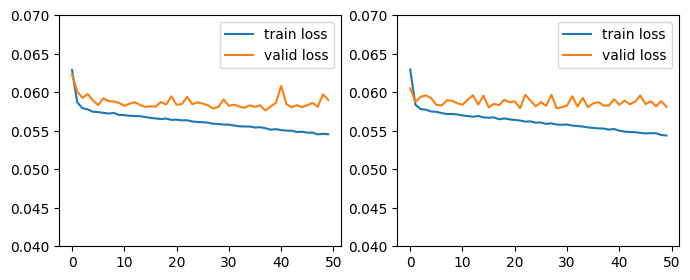

user_latent_finder :  0.055 0.059
item_latent_finder :  0.054 0.058

625/625 [==============================] - 2s 3ms/step
std :  [0.16280199 0.15662149 0.2575551 ]
std :  [0.7298002  0.70209457 1.15455444]
finder training 6/10


0/50
625/625 [==============================] - 11s 10ms/step - loss: 0.0606 - encoder_loss: 0.0582 - encoder_1_loss: 0.0591 - encoder_2_loss: 0.0601 - encoder_3_loss: 0.0613 - encoder_4_loss: 0.0623 - common_decoder_loss: 0.0625 - val_loss: 0.0585 - val_encoder_loss: 0.0585 - val_encoder_1_loss: 0.0583 - val_encoder_2_loss: 0.0583 - val_encoder_3_loss: 0.0585 - val_encoder_4_loss: 0.0586 - val_common_decoder_loss: 0.0589
1/50
625/625 [==============================] - 9s 14ms/step - loss: 0.0579 - encoder_loss: 0.0573 - encoder_1_loss: 0.0574 - encoder_2_loss: 0.0576 - encoder_3_loss: 0.0580 - encoder_4_loss: 0.0584 - common_decoder_loss: 0.0586 - val_loss: 0.0588 - val_encoder_loss: 0.0586 - val_encoder_1_loss: 0.0584 - val_encoder_2_loss: 0.0587 - val_enco

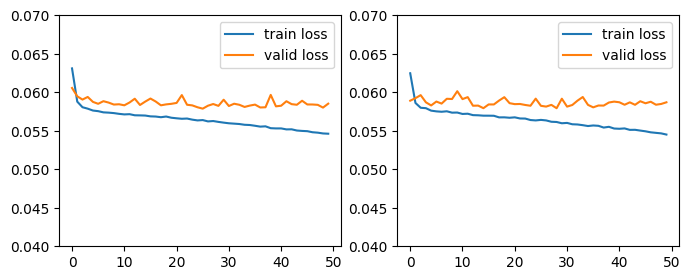

user_latent_finder :  0.055 0.059
item_latent_finder :  0.055 0.059

625/625 [==============================] - 2s 3ms/step
std :  [0.14429838 0.30031451 0.13819694]
std :  [0.69645173 1.44945881 0.66700329]
finder training 7/10


0/50
625/625 [==============================] - 10s 9ms/step - loss: 0.0609 - encoder_loss: 0.0585 - encoder_1_loss: 0.0594 - encoder_2_loss: 0.0607 - encoder_3_loss: 0.0616 - encoder_4_loss: 0.0626 - common_decoder_loss: 0.0628 - val_loss: 0.0590 - val_encoder_loss: 0.0586 - val_encoder_1_loss: 0.0584 - val_encoder_2_loss: 0.0589 - val_encoder_3_loss: 0.0591 - val_encoder_4_loss: 0.0595 - val_common_decoder_loss: 0.0597
1/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0580 - encoder_loss: 0.0576 - encoder_1_loss: 0.0575 - encoder_2_loss: 0.0578 - encoder_3_loss: 0.0581 - encoder_4_loss: 0.0584 - common_decoder_loss: 0.0587 - val_loss: 0.0591 - val_encoder_loss: 0.0585 - val_encoder_1_loss: 0.0585 - val_encoder_2_loss: 0.0588 - val_encode

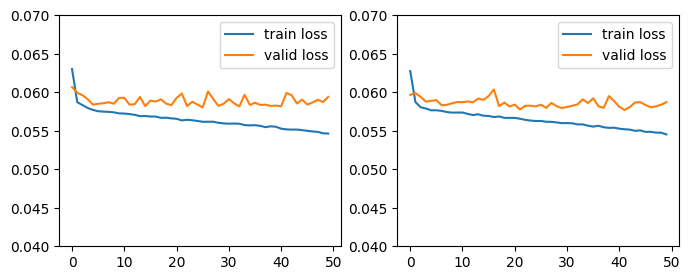

user_latent_finder :  0.055 0.059
item_latent_finder :  0.055 0.059

625/625 [==============================] - 2s 2ms/step
std :  [0.26385504 0.2997286  0.1377185 ]
std :  [1.15150787 1.30806612 0.60102673]
finder training 8/10


0/50
625/625 [==============================] - 11s 9ms/step - loss: 0.0608 - encoder_loss: 0.0585 - encoder_1_loss: 0.0595 - encoder_2_loss: 0.0606 - encoder_3_loss: 0.0614 - encoder_4_loss: 0.0622 - common_decoder_loss: 0.0626 - val_loss: 0.0587 - val_encoder_loss: 0.0585 - val_encoder_1_loss: 0.0584 - val_encoder_2_loss: 0.0586 - val_encoder_3_loss: 0.0586 - val_encoder_4_loss: 0.0588 - val_common_decoder_loss: 0.0591
1/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0580 - encoder_loss: 0.0575 - encoder_1_loss: 0.0576 - encoder_2_loss: 0.0578 - encoder_3_loss: 0.0580 - encoder_4_loss: 0.0584 - common_decoder_loss: 0.0587 - val_loss: 0.0593 - val_encoder_loss: 0.0596 - val_encoder_1_loss: 0.0595 - val_encoder_2_loss: 0.0593 - val_encode

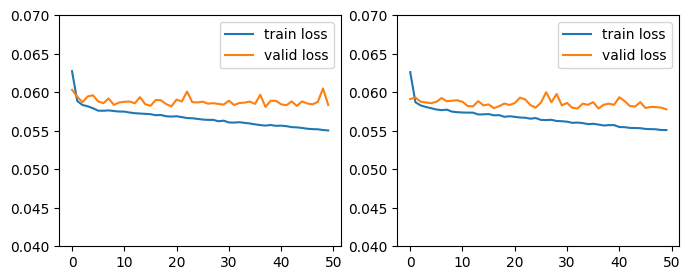

user_latent_finder :  0.055 0.058
item_latent_finder :  0.055 0.058

625/625 [==============================] - 2s 3ms/step
std :  [0.17047911 0.21440878 0.14988774]
std :  [0.87644457 1.10228996 0.77058297]
finder training 9/10


0/50
625/625 [==============================] - 12s 9ms/step - loss: 0.0610 - encoder_loss: 0.0585 - encoder_1_loss: 0.0595 - encoder_2_loss: 0.0607 - encoder_3_loss: 0.0618 - encoder_4_loss: 0.0625 - common_decoder_loss: 0.0628 - val_loss: 0.0595 - val_encoder_loss: 0.0588 - val_encoder_1_loss: 0.0587 - val_encoder_2_loss: 0.0591 - val_encoder_3_loss: 0.0596 - val_encoder_4_loss: 0.0603 - val_common_decoder_loss: 0.0606
1/50
625/625 [==============================] - 5s 7ms/step - loss: 0.0580 - encoder_loss: 0.0576 - encoder_1_loss: 0.0576 - encoder_2_loss: 0.0579 - encoder_3_loss: 0.0581 - encoder_4_loss: 0.0584 - common_decoder_loss: 0.0586 - val_loss: 0.0590 - val_encoder_loss: 0.0587 - val_encoder_1_loss: 0.0586 - val_encoder_2_loss: 0.0586 - val_encode

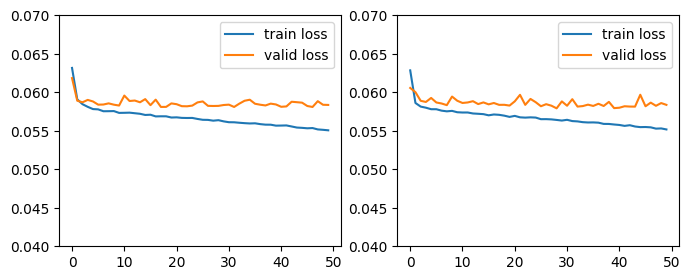

user_latent_finder :  0.055 0.058
item_latent_finder :  0.055 0.058

625/625 [==============================] - 3s 3ms/step
std :  [0.29350895 0.15200067 0.27554302]
std :  [1.43855639 0.74499104 1.35050117]
finder training 10/10


0/50
625/625 [==============================] - 16s 14ms/step - loss: 0.0610 - encoder_loss: 0.0589 - encoder_1_loss: 0.0597 - encoder_2_loss: 0.0604 - encoder_3_loss: 0.0615 - encoder_4_loss: 0.0626 - common_decoder_loss: 0.0628 - val_loss: 0.0599 - val_encoder_loss: 0.0586 - val_encoder_1_loss: 0.0589 - val_encoder_2_loss: 0.0595 - val_encoder_3_loss: 0.0600 - val_encoder_4_loss: 0.0612 - val_common_decoder_loss: 0.0611
1/50
625/625 [==============================] - 5s 8ms/step - loss: 0.0581 - encoder_loss: 0.0577 - encoder_1_loss: 0.0577 - encoder_2_loss: 0.0578 - encoder_3_loss: 0.0581 - encoder_4_loss: 0.0584 - common_decoder_loss: 0.0586 - val_loss: 0.0589 - val_encoder_loss: 0.0586 - val_encoder_1_loss: 0.0587 - val_encoder_2_loss: 0.0590 - val_enco

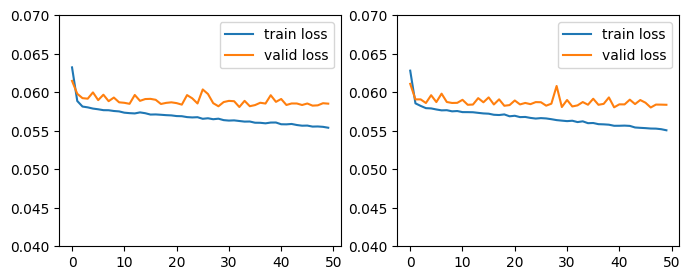

user_latent_finder :  0.055 0.059
item_latent_finder :  0.055 0.058

625/625 [==============================] - 3s 3ms/step
std :  [0.12049336 0.29429972 0.12984255]
std :  [0.49677547 1.21335214 0.5353207 ]


In [329]:
# MODEL_REPEAT_COUNT = 1
MODEL_REPEAT_COUNT = 10 # DEV
# EPOCHS = 200
EPOCHS = 50 # DEV
LATENT_UPDATE_PRERIOD = 10000000

user_latent_finder = None
item_latent_finder = None


for i in range(MODEL_REPEAT_COUNT):

  print("===============================================================")
  print(f"finder training {i+1}/{MODEL_REPEAT_COUNT}")
  print()

  common_decoder = build_decoder(name="common_decoder")

  user_latent_finder = build_and_compile_user_latent_finder(common_decoder, encoder_block_count=ENCODER_BLOCK_COUNT)
  item_latent_finder = build_and_compile_item_latent_finder(common_decoder, encoder_block_count=ENCODER_BLOCK_COUNT)
  
  print()

  train_finders(user_latent_finder, item_latent_finder, EPOCHS, loss_count=ENCODER_BLOCK_COUNT+1, latent_upate_preriod=LATENT_UPDATE_PRERIOD)

  print()

  update_user_and_item_latent_by_finder()


# score 값 회귀 확인

## train 데이터

In [330]:
x, true_scores = build_model_x_and_y(train_cases, score_count=ENCODER_BLOCK_COUNT+1)
true_scores = true_scores[-1]

predicted_scores = common_decoder.predict(x)


2500/2500 [==============================] - 3s 1ms/step


Train Data
true_score : predicted_score


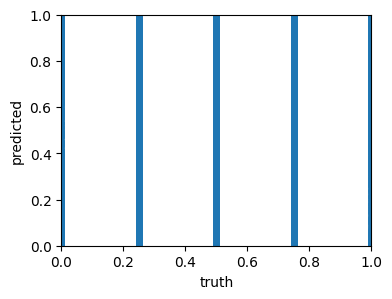

scaled mse  : 0.096
scaled rmse : 0.31
rating mse  : 1.534
rating rmse : 1.239


In [331]:
print("Train Data")
print("true_score : predicted_score")
plt.figure(figsize=(SCORE_SIZE*4, 3))
for i in range(SCORE_SIZE):
    plt.subplot(1,SCORE_SIZE,i+1)
    plt.scatter(true_scores[:,i], predicted_scores[:,i], marker='.')
    plt.xlim((0.0, 1.0))
    plt.ylim((0.0, 1.0))
    plt.xlabel('truth')
    plt.ylabel('predicted')
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(true_scores, predicted_scores)
print("scaled mse  :", round(mse, 3))
rmse = mse**0.5
print("scaled rmse :",round(rmse, 3))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
print("rating mse  :",round(mse, 3))
rmse = mse**0.5
print("rating rmse :",round(rmse, 3))

## test 데이터

In [332]:
x, true_scores = build_model_x_and_y(test_cases)
true_scores = true_scores[-1]

predicted_scores = common_decoder.predict(x)

312/312 [==============================] - 1s 1ms/step


Test Data
true_score : predicted_score


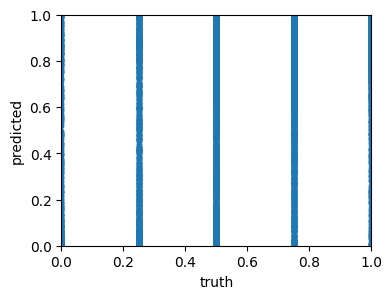

scaled mse  : 0.098
scaled rmse : 0.313
rating mse  : 1.571
rating rmse : 1.253


In [333]:
print("Test Data")
print("true_score : predicted_score")
plt.figure(figsize=(SCORE_SIZE*4, 3))
for i in range(SCORE_SIZE):
    plt.subplot(1,SCORE_SIZE,i+1)
    plt.scatter(true_scores[:,i], predicted_scores[:,i], marker='.')
    plt.xlim((0.0, 1.0))
    plt.ylim((0.0, 1.0))
    plt.xlabel('truth')
    plt.ylabel('predicted')
plt.show()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(true_scores, predicted_scores)
print("scaled mse  :", round(mse, 3))
rmse = mse**0.5
print("scaled rmse :",round(rmse, 3))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
print("rating mse  :",round(mse, 3))
rmse = mse**0.5
print("rating rmse :",round(rmse, 3))

# Predictor


##  모델 정의

In [334]:
def build_predictor():

  user_latent_input = Input((LATENT_SIZE,), name="user_latent_input")
  user_feature_input = Input((USER_FEATURE_SIZE,), name="user_feature_input")
  item_feature_input = Input((ITEM_FEATURE_SIZE,), name="item_feature_input")
  item_latent_input = Input((LATENT_SIZE,), name="item_latent_input")

  user_latent_x = Dense(int(LATENT_SIZE/2), activation="swish")(user_latent_input)
  user_feature_x = Dense(6, activation="swish")(user_feature_input)
  item_feature_x = Dense(6, activation="swish")(item_feature_input)
  item_latent_x = Dense(int(LATENT_SIZE/2), activation="swish")(item_latent_input)

  x = concatenate([user_latent_x, user_feature_x, item_feature_x, item_latent_x])
  # x = Dense(240, activation="swish")(x)
  x = Dense(32, activation="swish")(x)
  x = Dense(12, activation="swish")(x)
  x = Dense(6, activation="swish")(x)
  output_score = Dense(SCORE_SIZE, activation="sigmoid", name="output_score")(x)

  return Model((user_latent_input, user_feature_input, item_feature_input, item_latent_input), output_score, name="predictor")


In [335]:
predictor = build_predictor()
predictor.compile(loss="mse", optimizer=optimizer)

In [336]:
train_x, train_y = build_model_x_and_y(train_cases)
valid_x, valid_y = build_model_x_and_y(valid_cases)
train_y = train_y[-1]
valid_y = valid_y[-1]

## 학습

In [337]:
history = predictor.fit(train_x, train_y, validation_data=(valid_x, valid_y), epochs=100, batch_size=128)

Epoch 1/100


625/625 [==============================] - 2s 2ms/step - loss: 0.0580 - val_loss: 0.0587
Epoch 2/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0574 - val_loss: 0.0586
Epoch 3/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0572 - val_loss: 0.0585
Epoch 4/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0572 - val_loss: 0.0583
Epoch 5/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0571 - val_loss: 0.0586
Epoch 6/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0570 - val_loss: 0.0582
Epoch 7/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0570 - val_loss: 0.0582
Epoch 8/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0569 - val_loss: 0.0585
Epoch 9/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0569 - val_loss: 0.0582
Epoch 10/100
625/625 [==============================] - 1s 2ms/step - loss: 0.0568 - val_loss: 0.0585
E

In [338]:
x, true_scores = build_model_x_and_y(test_cases)
true_scores = true_scores[-1]

predicted_scores = predictor.predict(x)

312/312 [==============================] - 1s 3ms/step


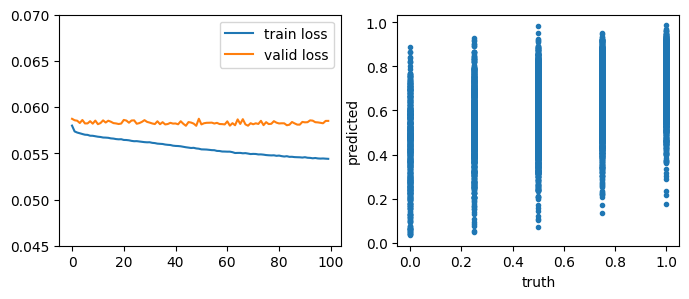

predictor :  0.054 0.059

scaled mse  : 0.058
scaled rmse : 0.242
rating mse  : 0.934
rating rmse : 0.966


In [339]:
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label="train loss")
plt.plot(history.history['val_loss'], label="valid loss")
plt.ylim((0.045, 0.07))
plt.legend()

plt.subplot(1,2,2)
plt.scatter(true_scores[:,0], predicted_scores[:,0], marker='.')
plt.xlabel('truth')
plt.ylabel('predicted')

plt.show()

print("predictor : ", round(history.history['loss'][-1], 3), round(history.history['val_loss'][-1], 3))
print()

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(true_scores, predicted_scores)
print("scaled mse  :", round(mse, 3))
rmse = mse**0.5
print("scaled rmse :",round(rmse, 3))

from sklearn.metrics import mean_squared_error
mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
print("rating mse  :",round(mse, 3))
rmse = mse**0.5
print("rating rmse :",round(rmse, 3))



In [340]:
predicted_values = {}
for i in range(5):
    truth_value = (i)/4
    predicted_values[truth_value] = []

for true_value, predicted_value in zip(true_scores, predicted_scores):
    predicted_values[true_value[0]].append(predicted_value[0])


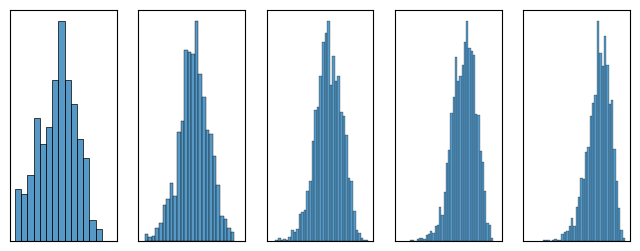

In [341]:
import seaborn as sns
f, axes = plt.subplots(1, 5, figsize=(8, 3), sharex=True)
for i in range(5):
    truth_value = (i)/4
    sns.histplot(predicted_values[truth_value], ax=axes[i], legend=False)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.show()